## Importing Python Modules to read databases

In [1]:
import pyodbc
import pandas.io.sql
import pandas as pd

### Defining the database parameters and connecting with the database

In [2]:
# parameters
server = 'defravmfv8huwr7.ey.net'
db= 'Service Desk'
db1 = 'Marvin 2.0'
uid = 'MarvinReader'
pwd = 'Marvin@123'
tcon = 'yes'

In [3]:
# Create the connection with DB Service Desk
conn_sd = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABASE=' + db + ';Trusted_Connection=yes')

In [4]:
# Create the connection with DB Marvin 2
#conn_marvin = pyodbc.connect('driver={SQL Server};server=' + server + 'DATABASE=' + db1 + ';uid=' + uid + ';pwd=' + pwd + 'Trusted_Connection=' + tcon)
conn_marvin = pyodbc.connect(driver='{SQL Server}', host=server, database=db1,
                      trusted_connection=tcon, user=uid, password=pwd)

In [5]:
# query db
#sql_open = "SELECT top 100 * FROM dbo.Stage_PostNov_Bubble"
#sql_closepen = "SELECT top (10000) * FROM Reporting.SLAData_Closed_Operational_Combined"

#df_open = pandas.io.sql.read_sql(sql_open, conn_sd)
#df_close = pandas.io.sql.read_sql(sql_closepen,conn_marvin)

### Retrieving samples of data from Marvin2.0 Database

In [6]:
#cols1 = "SELECT `u"
cols = "SELECT * FROM Reporting.SLAData_Closed_Operational_Combined WHERE [u_task u_impacted_ci] = 'Secure Hub'"
col = pandas.io.sql.read_sql(cols,conn_marvin)
col.columns = [c.replace(' ','_') for c in col.columns]
#df1_close.columns = [c.replace(' ','_') for c in df1_close.columns]
print(col.u_task_u_impacted_ci.describe())
print(col.columns)

count          10781
unique             1
top       Secure Hub
freq           10781
Name: u_task_u_impacted_ci, dtype: object
Index(['u_task_u_requested_by', 'u_task_u_requested_by_u_area',
       'u_task_u_requested_by_department',
       'u_task_u_requested_by_u_service_line', 'u_task_u_requested_by_vip',
       'u_task_u_requested_by_preferred_language', 'u_task_active',
       'u_task_contact_type', 'u_task_number', 'u_task_opened_at',
       'u_task_local_opened_at', 'u_task_u_reopen_count',
       'u_task_reassignment_count', 'u_task_priority',
       'u_task_u_resolved_date', 'u_task_u_local_resolved_date',
       'u_task_sys_mod_count', 'u_task_u_business_service',
       'u_task_u_impacted_application', 'u_task_subcategory', 'u_task_cmdb_ci',
       'u_task_made_sla', 'u_task_u_impacted_ci', 'u_task_u_impacted_account',
       'u_task_state', 'u_task_short_description', 'u_task_description',
       'u_task_close_notes', 'u_task_assignment_group_u_tier_level',
       'u_task_u_

In [7]:
# Reading the start and end time of tickets resolved
print(col.u_task_u_resolved_date.describe())
print("Missing Values in Resolved_date:",col.u_task_u_resolved_date.isnull().sum())

count                   10607
unique                  10421
top       2017-06-05 09:04:54
freq                        5
first     2017-01-09 10:06:00
last      2018-02-20 02:33:13
Name: u_task_u_resolved_date, dtype: object
Missing Values in Resolved_date: 174


In [8]:
print(col.u_task_opened_at.describe())
print("Missing Values in Opened Date:",col.u_task_opened_at.isnull().sum())

count                   10781
unique                  10774
top       2017-06-05 07:43:58
freq                        2
first     2017-01-06 03:57:00
last      2018-02-20 03:00:55
Name: u_task_opened_at, dtype: object
Missing Values in Opened Date: 0


In [9]:
col['resolved_time'] = pd.to_datetime(col.u_task_u_resolved_date.subtract(col.u_task_opened_at))
col['resolved_hours'] = ((col.resolved_time.dt.hour)+(col.resolved_time.dt.minute/60)+(col.resolved_time.dt.second/60/60))

In [10]:
print(col.resolved_hours.isnull().sum())

174


In [11]:
col.dropna(subset=['resolved_hours'], inplace=True)
print(col.resolved_hours.isnull().sum())
print(col.shape)

0
(10607, 79)


In [12]:
col.resolved_hours.value_counts().sort_index()

0.000000      6
0.001944      1
0.002222      2
0.002500     14
0.002778      6
0.003056      4
0.003333      6
0.003611     11
0.003889     11
0.004167      8
0.004444     10
0.004722      2
0.005000     11
0.005278     11
0.005556      8
0.005833      4
0.006111      7
0.006389      3
0.006667      4
0.006944      3
0.007222      6
0.007500      5
0.007778      5
0.008056      8
0.008333      5
0.008611     10
0.008889     10
0.009167      8
0.009444     13
0.009722      5
             ..
23.866111     1
23.876944     1
23.889444     1
23.895000     1
23.896667     1
23.898889     1
23.900556     1
23.909722     1
23.914444     1
23.914722     1
23.919444     1
23.920000     1
23.921944     1
23.923056     1
23.926111     1
23.933611     1
23.934722     1
23.939722     1
23.951389     1
23.960000     1
23.962500     1
23.963056     3
23.965000     1
23.968611     1
23.971944     1
23.975556     1
23.993056     1
23.995556     1
23.997500     1
23.998056     1
Name: resolved_hours, Le

In [13]:
col.resolved_hours.describe()

count    10607.000000
mean         3.189660
std          6.368583
min          0.000000
25%          0.071389
50%          0.245000
75%          2.251389
max         23.998056
Name: resolved_hours, dtype: float64

In [14]:
col.groupby('ClosedDesk_Level').resolved_hours.describe().unstack()
#result.groupby('cluster_category').resolved_hours.describe().unstack()

       ClosedDesk_Level
count  L3/L4                 25.000000
       Level 1             8206.000000
       Level 2              871.000000
       OSS                 1261.000000
       Specialist           224.000000
mean   L3/L4                  9.151856
       Level 1                2.194717
       Level 2                9.544075
       OSS                    4.174634
       Specialist             8.745745
std    L3/L4                  8.565142
       Level 1                5.320800
       Level 2                8.481632
       OSS                    7.202648
       Specialist             8.168374
min    L3/L4                  0.009444
       Level 1                0.000000
       Level 2                0.005556
       OSS                    0.001944
       Specialist             0.033333
25%    L3/L4                  0.393333
       Level 1                0.068333
       Level 2                2.276806
       OSS                    0.019167
       Specialist             2.499583
5

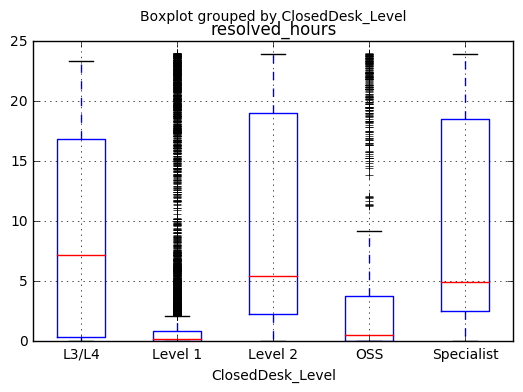

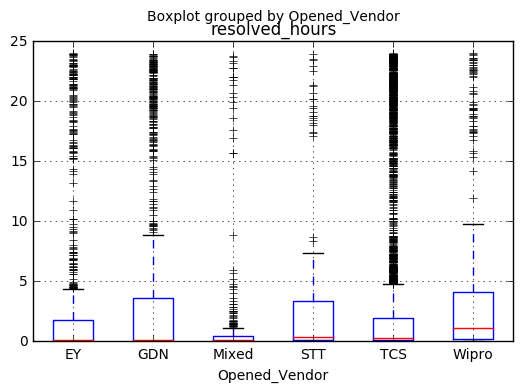

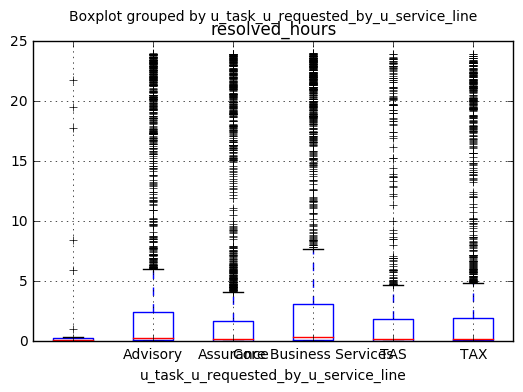

In [15]:
% matplotlib inline
col.boxplot('resolved_hours', by = 'ClosedDesk_Level')
col.boxplot('resolved_hours', by = 'Opened_Vendor')
col.boxplot('resolved_hours', by = 'u_task_u_requested_by_u_service_line')

In [16]:
# Examining the short_description details

print(col.u_task_short_description.head())
print(col.u_task_number.describe())

0                    BR - Secure Hub - How to install 
1                   FUP 2- Citrix Secure Hub iOS issue
2                BR - Secure Hub - Não esta executando
3                         citrix Secure Hub - Install 
4     XenMobile : Citrix secure hub saying invalid ...
Name: u_task_short_description, dtype: object
count          10607
unique         10605
top       SR09976578
freq               2
Name: u_task_number, dtype: object


### Importing required modules for text analytics

In [17]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [18]:
#convert the sample data 'col' into the python dataframe
df = pd.DataFrame(col)

In [19]:
df.shape
df.resolved_hours.isnull().sum()

0

In [20]:
# Examining the value counts as it exits in the data
counts = df.u_task_short_description.str.lower().value_counts()
counts

secure hub - unable to sign on                                                        498
secure hub                                                                            141
secure hub - unable to login                                                          103
secure hub - how to install secure hub                                                100
secure hub installation                                                                90
unable to login to secure hub                                                          65
secure hub-unable to login                                                             61
secure hub - installation                                                              51
secure hub - logging in after windows password is changed                              45
secure hub - unable to access                                                          42
unable to access secure hub                                                            41
good for m

In [21]:
df_sd = df.u_task_short_description
df_sd = pd.DataFrame(df_sd)
print(df_sd.head())
print(df_sd.shape)
print(type(df_sd))

                            u_task_short_description
0                  BR - Secure Hub - How to install 
1                 FUP 2- Citrix Secure Hub iOS issue
2              BR - Secure Hub - Não esta executando
3                       citrix Secure Hub - Install 
4   XenMobile : Citrix secure hub saying invalid ...
(10607, 1)
<class 'pandas.core.frame.DataFrame'>


### Remove unwanted words from the data like 'secure' and 'hub'

In [22]:
df_sd1 = df_sd.replace({'Secure':''},regex=True)
df_sd2 = df_sd1.replace({'Hub':''},regex=True)
df_sd3 = df_sd2.replace({'-':''},regex=True)
print(df_sd3.head())
print(df_sd3.tail())
print(df_sd3.shape)

                            u_task_short_description
0                             BR     How to install 
1                           FUP 2 Citrix   iOS issue
2                         BR     Não esta executando
3                                 citrix    Install 
4   XenMobile : Citrix secure hub saying invalid ...
                                u_task_short_description
10776                                  Unable to Sign On
10777  Software  Request  EY Contacts Push  Install  iOS
10778                                  Unable to Sign On
10779                        KL:  mail Unable to Sign On
10780                                  Unable to Sign On
(10607, 1)


### Instantiating CountVectorizer for Text Analytics

In [23]:
# Instantiating countvectorizer with parameters
vect = CountVectorizer(min_df=2,ngram_range=(1,2))
sd_dtm= vect.fit_transform(df_sd3.u_task_short_description)

In [24]:
print(vect.get_feature_names()[0:5000])

['01', '01 09', '01 unable', '02', '02 unable', '03', '03 04', '03 11', '03 2017', '03 ist', '04', '04 2017', '04082017', '05', '05 09', '05 2017', '05 ist', '06', '06 11', '06 2017', '07', '07 10', '07 11', '07 12', '07 2017', '07 21', '07 30', '08', '08 09', '08 14', '08 2017', '09', '09 01', '09 11', '09 18', '09 2017', '09 21', '09 at', '10', '10 01', '10 02', '10 11', '10 19', '10 20', '10 2017', '10 30', '11', '11 03', '11 15', '11 16', '11 17', '11 19', '11 2017', '11 55', '12', '12 09', '12 2017', '129', '13', '13 citrix', '14', '14 09', '14 47', '15', '15 02', '15 am', '16', '16 11', '17', '17 03', '17 06', '17 10', '18', '19', '19 59', '1st', '20', '2017', '2017 11', '2017 12', '2017 21', '2017 23', '2017 52', '2017 citrix', '2017 hub', '2017 time', '2017 unable', '2018', '21', '21 07', '21 2017', '22', '23', '23 05', '23 pm', '24', '24 04', '25', '25 07', '26', '27', '27 07', '28', '28 11', '28 ist', '29', '29 11', '29 2017', '30', '30 11', '30 pm', '31', '32', '32 am', '33'

In [25]:
cluster = KMeans(n_clusters=6,random_state=4235)
sdcluster = cluster.fit_predict(sd_dtm)

In [26]:
cluster

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=4235, tol=0.0001, verbose=0)

In [27]:
print(sdcluster.shape)
print(df_sd.shape)
sdcluster = pd.DataFrame(sdcluster)
print(sdcluster.shape)
print(sdcluster.describe())
type(sdcluster)
sdcluster=sdcluster.rename(columns={0:'cluster_number'})
sdcluster.tail()

(10607,)
(10607, 1)
(10607, 1)
                  0
count  10607.000000
mean       2.127934
std        1.215235
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000


,cluster_number
10602,4
10603,2
10604,4
10605,4
10606,4


In [28]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
counts = sdcluster.cluster_number.value_counts()
#counts = df.u_task_short_description.str.lower().value_counts()
print(counts)
counts[1]

2    5104
4    1674
0    1306
3    1224
1    1125
5     174
Name: cluster_number, dtype: int64


1125

In [30]:
x_axis = counts
y_axis = counts
ind = np.arange(len(x_axis))
print(ind)
print(y_axis)

[0 1 2 3 4 5]
2    5104
4    1674
0    1306
3    1224
1    1125
5     174
Name: cluster_number, dtype: int64


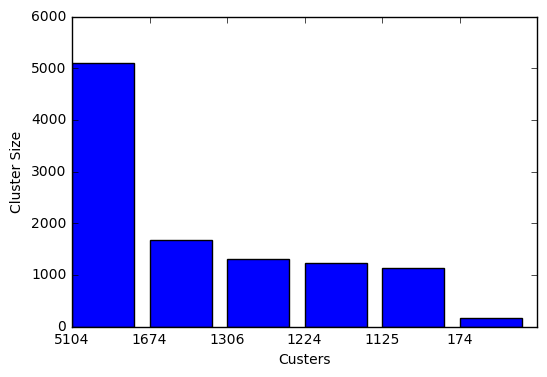

In [31]:
plt.bar(ind,y_axis)
plt.xticks(ind,x_axis)
plt.ylabel('Cluster Size')
plt.xlabel('Custers')

In [32]:
print(df.shape)
print(sdcluster.shape)
result = pd.concat([sdcluster,df],axis=1,ignore_index=False)
print(result.shape)

(10607, 79)
(10607, 1)
(10778, 80)


In [33]:
value_0 = result.u_task_short_description[result.cluster_number==0] 
value_1 = result.u_task_short_description[result.cluster_number==1]
value_2 = result.u_task_short_description[result.cluster_number==2]
value_3 = result.u_task_short_description[result.cluster_number==3]
value_4 = result.u_task_short_description[result.cluster_number==4]
value_5 = result.u_task_short_description[result.cluster_number==5]
value_6 = result.u_task_short_description[result.cluster_number==6]

In [34]:
# Define the clusters to replace it in the Cluster_number columns
# Cluster 0 = How to Install
# Cluster 1 = Password Reset / Synchronization or Invalid Credentials
# Cluster 2 = Unable to Login
# Cluster 3 = How to Install or access

In [35]:
print(value_0.value_counts())
print(value_0.shape)

Secure Hub - Unable to Sign On                                                                                            39
Secure Hub - Unable to login                                                                                               9
Secure Hub - how to install Secure Hub                                                                                     9
Secure Hub - Logging in after Windows password is changed                                                                  8
Secure hub - How to install and set up Secure Hub and mail                                                                 7
Secure Hub-how to install Secure Hub                                                                                       6
Secure Hub-Unable to login                                                                                                 5
Secure Hub - How to Install and Configure the Secure Hub for the First-Time Usage                                          5


In [36]:
print(value_1.value_counts())
print(value_1.shape)

Secure Hub - Unable to Sign On                                                       46
GOOD for Mobile Shutting down - Upgrade to Citrix Secure Hub required                 9
Secure hub                                                                            7
Secure Hub - how to install Secure Hub                                                7
Secure Hub - How to Install and Configure the Secure Hub for the First-Time Usage     5
Secure Hub - Unable to login                                                          5
Secure Hub                                                                            5
Secure Hub installation                                                               4
secure hub                                                                            4
Secure Hub - How do I install? - Android and iOS                                      4
Secure Hub - How do I install                                                         4
Secure Hub -Installation        

In [37]:
print(value_2.value_counts())
print(value_2.shape)

Secure Hub - Unable to Sign On                                                                         185
Secure Hub                                                                                              36
Secure Hub - Unable to login                                                                            30
Secure hub                                                                                              29
Secure Hub-Unable to login                                                                              22
Secure Hub - how to install Secure Hub                                                                  22
Secure Hub - Logging in after Windows password is changed                                               21
GOOD for Mobile Shutting down - Upgrade to Citrix Secure Hub required                                   19
Secure Hub - Installation                                                                               18
CO - Citrix Secure Mail              

In [38]:
print(value_3.value_counts())
print(value_3.shape)

Secure Hub - Unable to Sign On                                                         50
Secure Hub - Unable to login                                                            9
Requested to guide through to install secure hub                                        9
CO - Citrix Secure Mail                                                                 7
Secure Hub installation                                                                 5
secure hub                                                                              4
Unable to login to secure hub                                                           4
Secure Hub Installation                                                                 4
Secure Hub -Unable to login: getting an error 'Incorrect user name or bad password'     4
Secure Hub-Unable to login                                                              4
Unable to login to Secure Hub                                                           3
Secure Hub

In [39]:
print(value_4.value_counts())
print(value_4.shape)

Secure Hub - Unable to Sign On                                                                                       123
Secure Hub - how to install Secure Hub                                                                                18
Secure hub                                                                                                            12
Secure Hub                                                                                                             9
Secure Hub - How do I install iOS                                                                                      7
Secure Hub - How to Install and Configure the Secure Hub for the First-Time Usage                                      6
Secure Hub-Unable to login                                                                                             6
Secure Hub- Unable to login                                                                                            6
Secure Hub - Logging in after Wi

In [40]:
print(value_5.value_counts())
print(value_5.shape)

Secure Hub - Unable to Sign On                                                                             8
Secure Hub - how to install secure hub                                                                     2
Secure Hub - How do I install? - Android and iOS                                                           2
Secure Hub - How to Install and Configure the Secure Hub for the First-Time Usage                          2
Secure Hub - iOS Untrusted Enterprise Developer prompt                                                     1
Secure mail-Unable to  configure Secure mail                                                               1
FUP 3 @ 26/10 20.48  IST Password not accepting user needs assistance                                      1
France - Secure Hub - Login Assistance                                                                     1
[TAX]Question about SecureHub password<0.5>                                                                1
Secure Hub-Unable t

In [41]:
result['cluster_category'] = result['cluster_number'].map({0:'install / login',1:'How to login / install',2:'login after windows password is changed',3:'secure hub installation',4:'Unable to login / access',5:'unable to sign on'})
#w['female'] = w['female'].map({'female': 1, 'male': 0})
result.tail()

,cluster_number,u_task_u_requested_by,u_task_u_requested_by_u_area,u_task_u_requested_by_department,u_task_u_requested_by_u_service_line,u_task_u_requested_by_vip,u_task_u_requested_by_preferred_language,u_task_active,u_task_contact_type,u_task_number,...,Linkedticket,OpenDesk,OpenDesk_Level,sys_updated_on,Opened_Vendor,ClosedDesk,ClosedDesk_Level,resolved_time,resolved_hours,cluster_category
10776,NaN,Julia Brun,EM,FRANCE,Assurance,false,English,false,Phone,INC7279522,...,None,GSD,Level 1,None,TCS,GSD,Level 1,1970-01-01 00:04:22,0.072778,NaN
10777,NaN,Philippe Fourquet,EM,FRANCE,Assurance,false,English,false,Phone,SR10858558,...,None,GSD,Level 1,None,TCS,OSS,OSS,1970-01-19 05:50:14,5.837222,NaN
10778,NaN,Jodie Lichtenstein,AA,UNITED STATES,Assurance,false,English,false,Phone,INC7273015,...,None,GSD,Level 1,None,TCS,GSD,Level 1,1970-01-01 00:04:31,0.075278,NaN
10779,NaN,Kelly Rochlin,AA,UNITED STATES,Core Business Services,true,English,false,Phone,INC7261000,...,None,GSD,Level 1,None,TCS,GSD,Level 1,1970-01-01 00:11:43,0.195278,NaN
10780,NaN,Archit Mehra,EM,INDIA,Core Business Services,false,English,false,Phone,INC7277375,...,None,GSD,Level 1,None,Wipro,GSD,Level 1,1970-01-01 00:10:13,0.170278,NaN


In [42]:
from __future__ import division
cluster_category_summary = pd.crosstab(result.cluster_category,result.ClosedDesk_Level)
requester_country = pd.crosstab(result.cluster_category,result.u_task_u_requested_by_department)
#pd.crosstab(df.A, df.B).apply(lambda r: r/r.sum(), axis=1)

In [43]:
cluster_category_summary
#print(requester_country)

ClosedDesk_Level,L3/L4,Level 1,Level 2,OSS,Specialist
cluster_category,,,,,
How to login / install,2,853,77,146,25
Unable to login / access,2,1294,141,170,34
install / login,0,988,105,155,32
login after windows password is changed,18,3856,429,611,110
secure hub installation,3,950,86,141,19
unable to sign on,0,137,18,17,0


In [44]:
import seaborn as sns

C:\Users\madhan.s\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


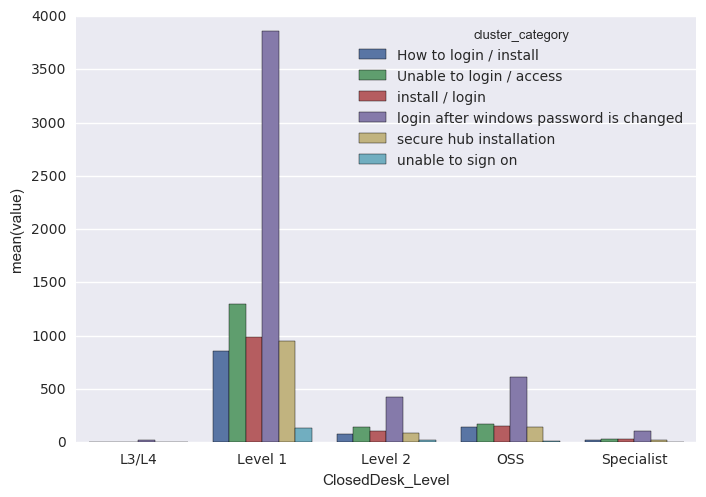

In [45]:
 # now stack and reset
stacked = cluster_category_summary.stack().reset_index().rename(columns={0:'value'})

 # plot grouped bar chart
sns.barplot(x=stacked.ClosedDesk_Level, y=stacked.value, hue=stacked.cluster_category)

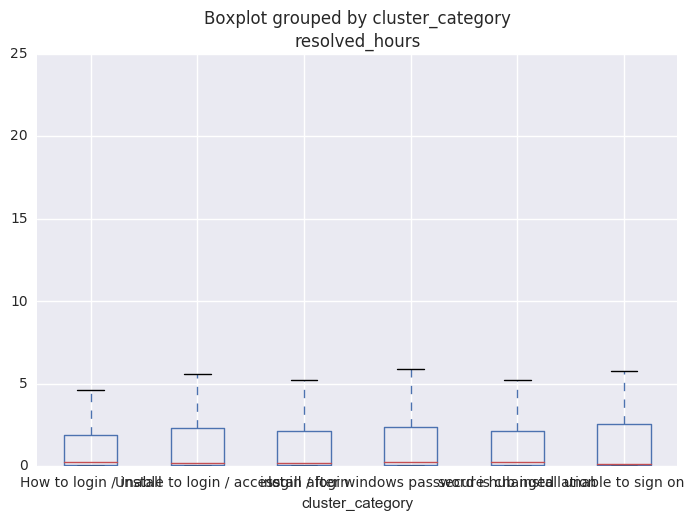

In [46]:
result.boxplot('resolved_hours', by = 'cluster_category')

In [47]:
result.groupby('cluster_category').resolved_hours.describe().unstack()

       cluster_category                       
count  How to login / install                     1104.000000
       Unable to login / access                   1647.000000
       install / login                            1281.000000
       login after windows password is changed    5031.000000
       secure hub installation                    1201.000000
       unable to sign on                           172.000000
mean   How to login / install                        2.748333
       Unable to login / access                      3.223133
       install / login                               3.206412
       login after windows password is changed       3.275632
       secure hub installation                       3.071248
       unable to sign on                             3.338931
std    How to login / install                        5.839625
       Unable to login / access                      6.452727
       install / login                               6.358107
       login after wind

In [48]:
result.dropna(subset=['cluster_category'],inplace=True)
#col.dropna(subset=['resolved_hours'], inplace=True)
result.tail()

,cluster_number,u_task_u_requested_by,u_task_u_requested_by_u_area,u_task_u_requested_by_department,u_task_u_requested_by_u_service_line,u_task_u_requested_by_vip,u_task_u_requested_by_preferred_language,u_task_active,u_task_contact_type,u_task_number,...,Linkedticket,OpenDesk,OpenDesk_Level,sys_updated_on,Opened_Vendor,ClosedDesk,ClosedDesk_Level,resolved_time,resolved_hours,cluster_category
10602,4.0,Yawar Mehboob,EM,UNITED KINGDOM,Assurance,false,English,false,Phone,INC7112728,...,None,GSD,Level 1,None,TCS,GSD,Level 1,1970-01-04 23:15:28,23.257778,Unable to login / access
10603,2.0,Debra Aerne,AA,UNITED STATES,Core Business Services,false,English,false,Phone,SR11033283,...,None,GSD,Level 1,None,TCS,GSD,Level 1,1970-01-01 00:06:01,0.100278,login after windows password is changed
10604,4.0,R Rejeesh,AA,UNITED STATES,Core Business Services,false,English,false,Phone,INC7156250,...,None,GSD,Level 1,None,TCS,GSD,Level 2,1970-01-09 23:34:16,23.571111,Unable to login / access
10605,4.0,Thomas O'Neill,AA,UNITED STATES,TAX,false,English,false,Phone,SR10995909,...,None,GSD,Level 1,None,TCS,GSD,Level 1,1970-01-01 00:06:28,0.107778,Unable to login / access
10606,4.0,Steve Krouskos,EM,UNITED KINGDOM,TAS,true,English,false,How's IT,SR11136242,...,None,OSS,OSS,None,None,OSS,OSS,1970-01-01 00:02:27,0.040833,Unable to login / access


### Sample of January Data

In [49]:
cols_jan = "SELECT * FROM Reporting.SLAData_Closed_Operational_Combined WHERE [u_task opened_at] >= '2018-01-01' AND [u_task u_impacted_ci] = 'Secure Hub'"
col_jan = pandas.io.sql.read_sql(cols_jan,conn_marvin)

In [50]:
col_jan.columns = [c.replace(' ','_') for c in col_jan.columns]

In [51]:
col_jan.u_task_opened_at.describe()

count                     785
unique                    785
top       2018-02-09 13:41:03
freq                        1
first     2018-01-01 07:23:59
last      2018-02-20 03:00:55
Name: u_task_opened_at, dtype: object

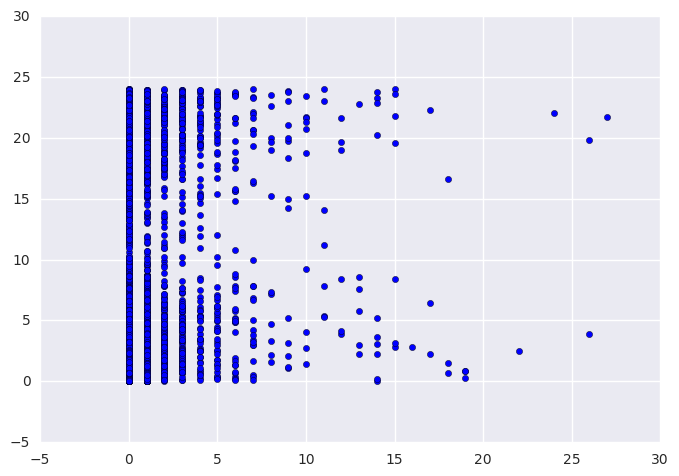

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
plt.scatter(result.u_task_reassignment_count,result.resolved_hours)